## Data@ANZ Customer Transaction - Exploratory Data Analysis
The dataset contains transaction details of 3 months (Aug, Sep, Oct). It contains purchase, salary and recurring transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Df1= pd.read_excel(r"C:\Users\oman\Desktop\PHPPRO\ANZ synthesised transaction dataset.xlsx")
Df1.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
Df1.shape 

(12043, 23)

<b>There are 12043 rows and 23 columns in the dataset</b>

In [4]:
Df1.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


<ul>
    <li>Average Transaction amount is around 188 in total.</li>
    <li>Maximum Transaction done is 8836</li>
    <li>Minimum Transaction done is 0.1</li>
    <li>Average age of customers is 30</li>
</ul>    

### Exploratory Data Analysis
Below are the steps involved to understand, clean and prepare your data for building your predictive model:

    1)Missing values identification
    2)Variable transformation
    3)Outlier identification 
    4)Univariate Analysis
    5)Bi-variate Analysis 

<b>Percentage of Missing value in each column</b>

In [5]:
Df1.isnull().sum() * 100 / len(Df1) 

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

<b>'bpay_biller_code' and 'merchant_code' have 92% of null values we can directly drop these features</b>

In [6]:
Df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

<b>There is a datetime feature present i.e it is a time series data that has to be transformed into pandas timestap</b>

<b>Variable Transformation:</b> Lets extract Month and Day column from Date for better analysis but first change date column to pandas timestamp i.e (2018-10-31) (yy-mm-dd)

In [7]:
Df1[['date','gender']].tail(5)

,date,gender
12038,2018-10-31,F
12039,2018-10-31,M
12040,2018-10-31,M
12041,2018-10-31,M
12042,2018-10-31,M


In [8]:
Df1['date'] = pd.to_datetime(Df1['date']) 
# It was already in datetime format just made sure

In [9]:
type(Df1.date[0]) # [0] is basically to check the datatype of first value inside date

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
Df1['month'] = Df1['date'].dt.month_name()
Df1['day'] = Df1['date'].dt.day_name()

In [11]:
Df1[['date','month','day','amount']].tail(5)

,date,month,day,amount
12038,2018-10-31,October,Wednesday,9.79
12039,2018-10-31,October,Wednesday,63.87
12040,2018-10-31,October,Wednesday,43.96
12041,2018-10-31,October,Wednesday,30.77
12042,2018-10-31,October,Wednesday,22.36


<b>Outlier identification</b>

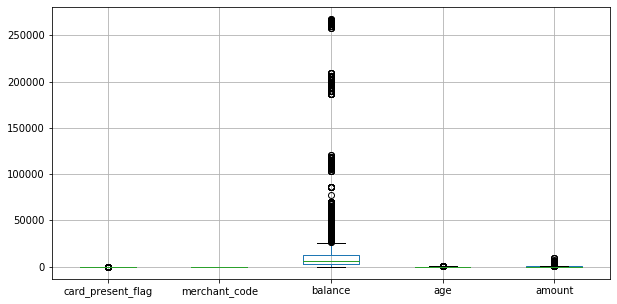

In [12]:
plt.figure(figsize=(10,5))
Df1.boxplot() # Creating boxplot to identify outlier in continous variable

<b>We can see significant number of large values in 'balance' and 'amount' column.</b>

### Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

<b>Continuous Variables:</b> we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram or distplot(Frequency) which is used to measure the distribution of single variable etc.  

<b>Categorical Variable:</b> we can plot the Frequency using countplot or use value_counts() etc.

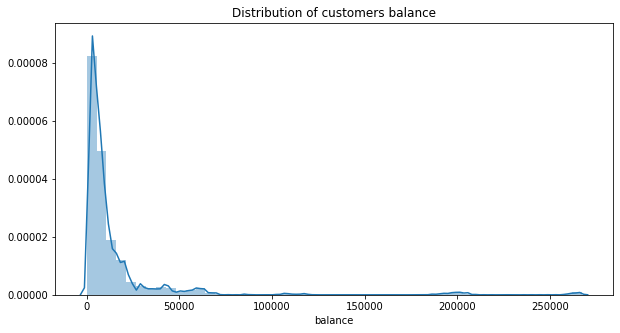

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(Df1['balance']) 
plt.title('Distribution of customers balance')
plt.show()

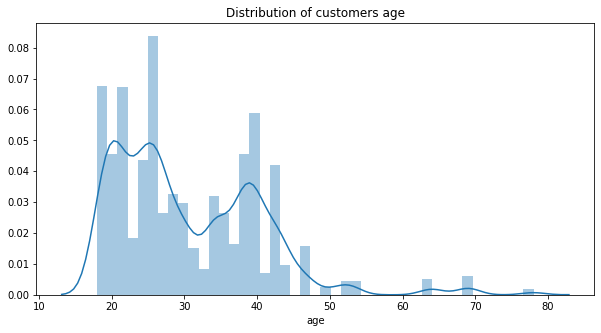

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(Df1['age']) 
plt.title('Distribution of customers age')
plt.show()

<b>Large number of bank customers are between the age of 20-30</b>

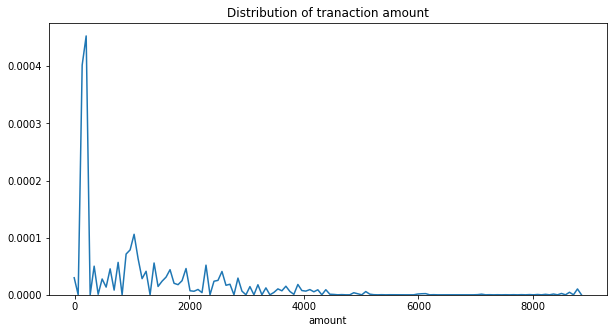

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(Df1['amount'], hist=False) 
plt.title('Distribution of tranaction amount')
plt.show()

M    6285
F    5758
Name: gender, dtype: int64


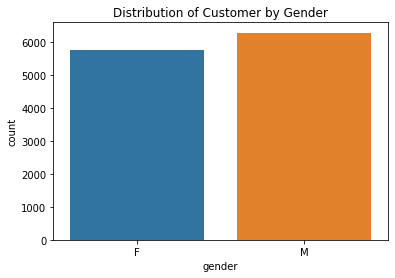

In [16]:
print(Df1['gender'].value_counts())
sns.countplot(Df1['gender'])
plt.title("Distribution of Customer by Gender")
plt.show()

<b>Male did more transactions than Female</b>

debit     11160
credit      883
Name: movement, dtype: int64


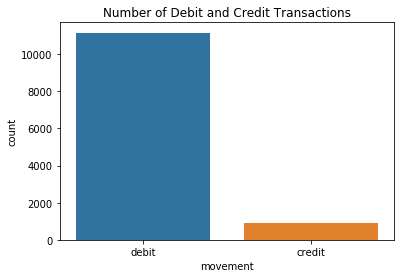

In [17]:
print(Df1['movement'].value_counts())
sns.countplot(Df1['movement'])
plt.title('Number of Debit and Credit Transactions')
plt.show()

<b>Majority of transactions were debit</b>

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


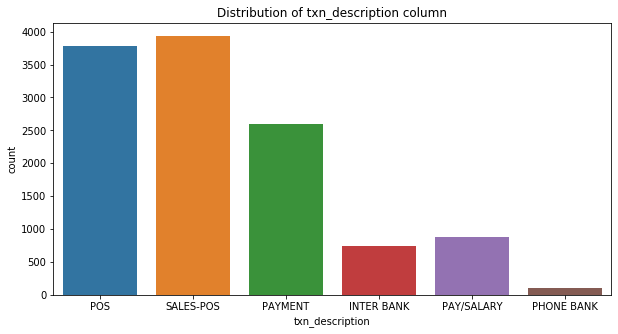

In [18]:
print(Df1['txn_description'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(Df1['txn_description'])
plt.title('Distribution of txn_description column')
plt.show()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


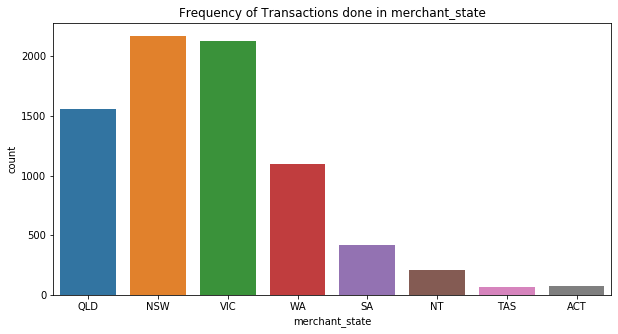

In [19]:
print(Df1['merchant_state' ].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(Df1['merchant_state' ])
plt.title('Frequency of Transactions done in merchant_state')
plt.show()    

authorized    7717
posted        4326
Name: status, dtype: int64


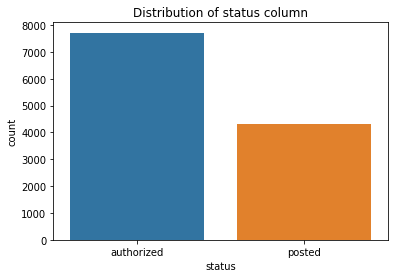

In [20]:
print(Df1['status'].value_counts())
sns.countplot(Df1['status'])
plt.title('Distribution of status column')
plt.show()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64


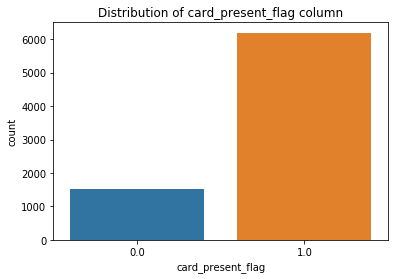

In [21]:
print(Df1['card_present_flag'].value_counts())
sns.countplot(Df1['card_present_flag'])
plt.title('Distribution of card_present_flag column')
plt.show()

### Bi-Variate Analysis
Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical(countplot), Categorical & Continuous and Continuous & Continuous(lineplot). Different methods are used to tackle these combinations during analysis process.

In [22]:
Aug = (Df1['month'] == 'August')
Aug_sum = Df1.loc[Aug, 'amount']
a=Aug_sum.mean()
print('Average Transaction done in August is = %f' %a)

Average Transaction done in August is = 185.121867


In [23]:
Sept = (Df1['month'] == 'September')
Sept_sum = Df1.loc[Sept, 'amount']
b=Sept_sum.mean()
print('Average Transaction done in September is = %f' %b)

Average Transaction done in September is = 182.045903


In [24]:
Oct = (Df1['month'] == 'October')
Oct_sum = Df1.loc[Oct, 'amount']
c=Oct_sum.mean()
print('Average Transaction done in October is = %f' %c)

Average Transaction done in October is = 196.427323


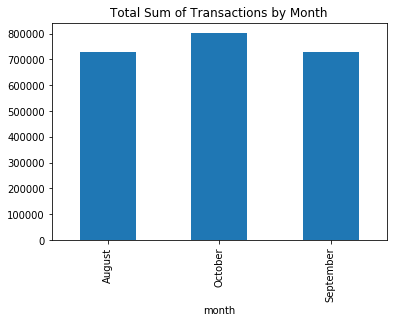

In [25]:
Df1['amount'].groupby(Df1['month']).sum().plot(kind='bar')
plt.title("Total Sum of Transactions by Month")
plt.show()

<b>The total sum of transactions was highest in October</b> 

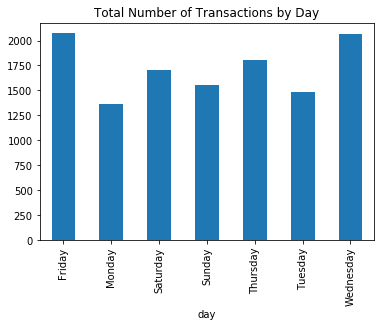

In [26]:
Df1['amount'].groupby(Df1['day']).count().plot(kind='bar')
plt.title("Total Number of Transactions by Day")
plt.show()

<b>Highest number of transactions were done on Wednesday and Friday</b>

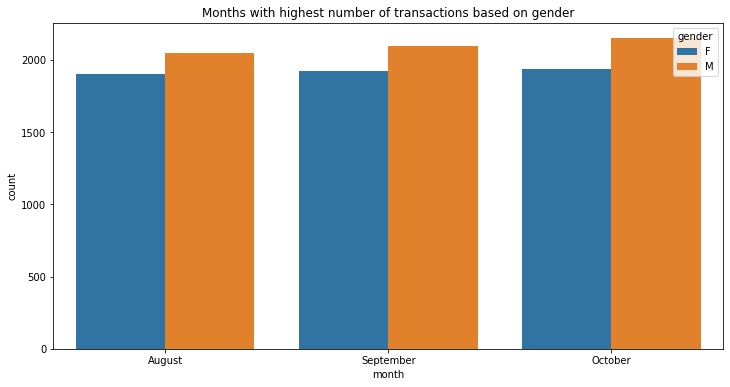

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='month' ,hue='gender', data=Df1)
plt.title('Months with highest number of transactions based on gender')
plt.show()

<b>In all the three months, male did more transactions than female</b>

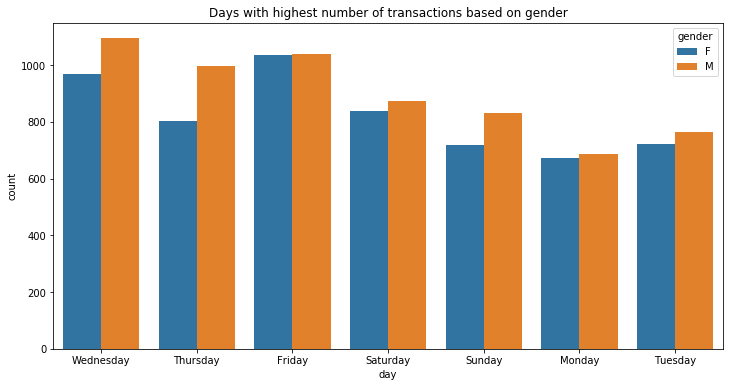

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='day', hue='gender', data=Df1)
plt.title("Days with highest number of transactions based on gender")
plt.show()

<b>In all the days male did more tranactions than female except on Friday where it was almost equal.</b>

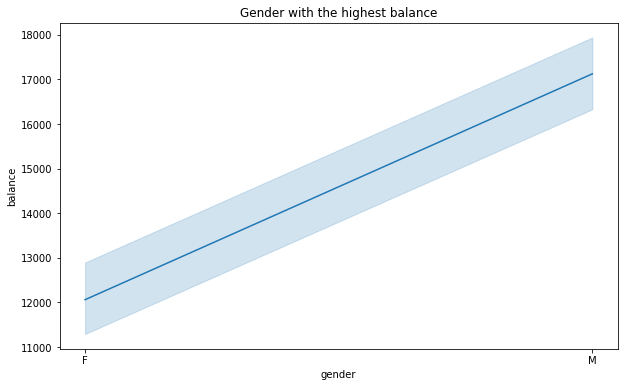

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x='gender', y='balance', data=Df1)
plt.title('Gender with the highest balance')
plt.show()

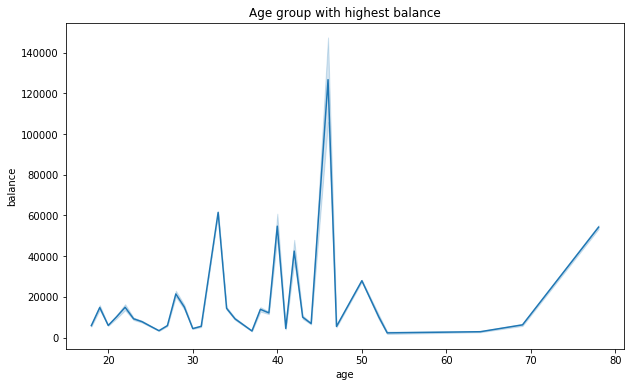

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='balance', data=Df1)
plt.title('Age group with highest balance')
plt.show()

<b>Customers between the age of 45-50 had the highest bank balance</b>

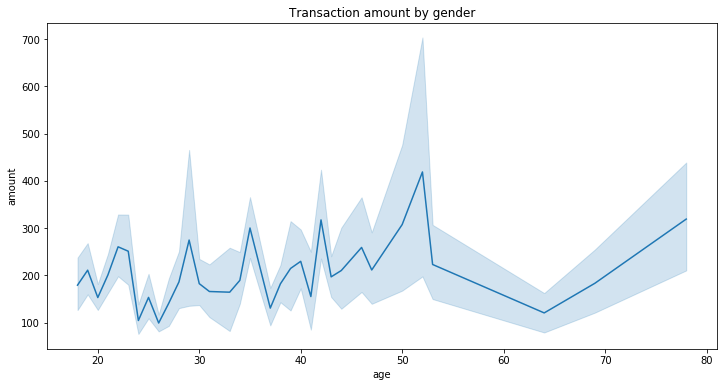

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age', y='amount', data=Df1)
plt.title('Transaction amount by gender')
plt.show()

<b>Customers between the age of 45-55 made most transactions</b>

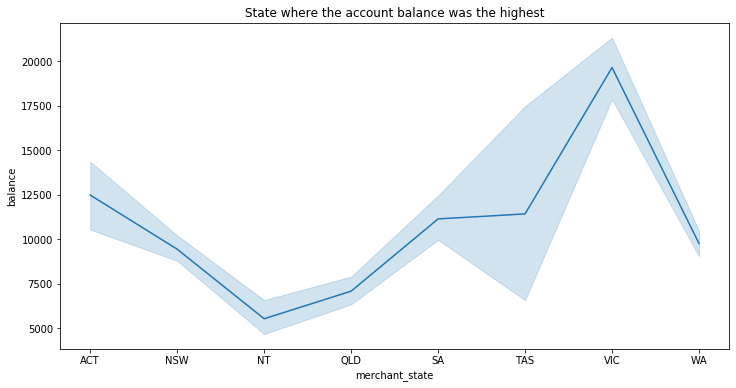

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(x='merchant_state', y='balance', data=Df1)
plt.title("State where the account balance was the highest")
plt.show()

<b>Customers from VIC had the highest bank balance</b>

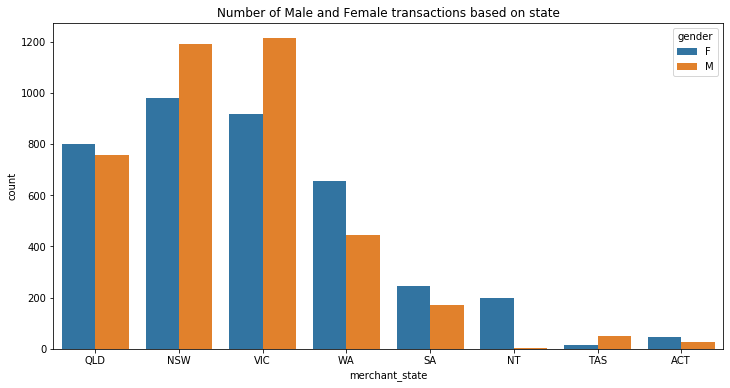

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='merchant_state', hue='gender', data=Df1)
plt.title('Number of Male and Female transactions based on state')
plt.show()

In [34]:
grp_merch_state = Df1.groupby(['merchant_state'])
print(grp_merch_state['gender'].value_counts(normalize=True))

merchant_state  gender
ACT             F         0.630137
                M         0.369863
NSW             M         0.548179
                F         0.451821
NT              F         0.975610
                M         0.024390
QLD             F         0.514139
                M         0.485861
SA              F         0.590361
                M         0.409639
TAS             M         0.764706
                F         0.235294
VIC             M         0.569216
                F         0.430784
WA              F         0.597273
                M         0.402727
Name: gender, dtype: float64


<b>An excellent graph that is giving some really important insights, such as:</b>
<ul>
    <li>Despite being outnumbered by Male, Female customers did more transactions in majority of the states like QLD (51%), WA (59%), SA (59%), NT (97%), ACT (63%)</li>
    <li>Whereas male only did more transactions only in NSW (54%), VIC (56%), TAS (76%)</li>
    </ul>
    

In [35]:
agg_state_amt = grp_merch_state['amount'].agg(['min' , 'mean' , 'max'])
agg_state_amt

,min,mean,max
merchant_state,,,
ACT,4.50,66.803836,1348.47
NSW,0.10,47.036316,4233.00
NT,1.71,44.726293,1285.09
QLD,0.10,34.372397,7081.09
SA,3.28,40.425470,909.61
TAS,7.35,28.866618,133.31
VIC,0.10,41.099953,3680.71
WA,2.05,30.901873,1692.56


<b>Minimum, Maximum and Average transaction amount from each state</b>

In [36]:
agg_state_bal = grp_merch_state['balance'].agg(['min' , 'mean' , 'max'])
agg_state_bal

,min,mean,max
merchant_state,,,
ACT,702.23,12489.304384,30975.58
NSW,1.02,9448.416763,266754.88
NT,9.63,5542.410195,61504.05
QLD,2.85,7092.003541,264998.56
SA,11.23,11150.330096,189986.01
TAS,4.34,11431.072941,117989.40
VIC,0.24,19653.248109,267093.66
WA,0.98,9769.532018,69602.01


<b>Minimum, Maximum and Average balance from each state</b>